In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import os

**Liste des constantes**

In [11]:
#Lister les images du dossier images
Lnom = os.listdir("DataSet/DataSetPostTraitement/")
Lnom.remove('test')
#imageCherchee = "IMG_2144_R.jpeg"
#Lnom.remove(imageCherchee)
"""Lnom.remove('imgAymericcSki.jpg')
Lnom.remove('imgSimonSki.jpg')
Lnom.remove('imgEstebanSki.jpg')
Lnom.remove('imgpPtx.jpg')"""

"Lnom.remove('imgAymericcSki.jpg')\nLnom.remove('imgSimonSki.jpg')\nLnom.remove('imgEstebanSki.jpg')\nLnom.remove('imgpPtx.jpg')"

**Lecture d'une image** <br>
Fonction qui prend en paramètre un nom d'image et retourne le tableau de pixels de l'image

In [12]:
# Read image from file
def lecture_image(nom_image : str) -> np.ndarray:
    image = cv.imread(f"DataSet/DataSetPostTraitement/{nom_image}",0)
    return image

**Récupération de l'image** <br>
Récupération de la liste d'image et calcul de l'image moyenne de la liste

In [13]:
Limg = [lecture_image(nom_image) for nom_image in Lnom] #Récupération des images
LimgVect = [img.flatten() for img in Limg] #Vectorisation des images
M = len(Limg)

In [14]:
sumVect = np.add.reduce(LimgVect) #Somme des vecteurs
meanVect = sumVect/M #Moyenne des vecteurs

**Affichage de l'image Moyenne**

In [15]:
meanImg = meanVect.reshape(2000,2000)

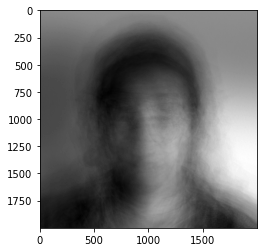

In [16]:
plt.imshow(meanImg,cmap='gray')

**Calcul des vecteurs d'écart à la moyenne pour chaque image**

In [17]:
VectEcart = {nom_image : np.subtract(LimgVect[i],meanVect) for i,nom_image in enumerate(Lnom)} #Vecteur d'écart

**Affichage des Vecteur d'écart** 

In [18]:
A = np.array([VectEcart[nom_image] for nom_image in Lnom]).T #Matrice des vecteurs d'écart
print("La matrice A est de dimension",A.shape)

La matrice A est de dimension (4000000, 67)


**Calcul des valeurs et des vecteurs propres**

In [19]:
matAAT = np.dot(A.T,A) #Matrice AAt
print("La matrice AT.A est de dimension",matAAT.shape)
print(matAAT)

La matrice AT.A est de dimension (67, 67)
[[ 8.13315671e+09  2.78104964e+09  5.04070946e+09 ...  4.47641609e+08
   1.51131684e+09  1.87000690e+09]
 [ 2.78104964e+09  6.48831814e+09  3.01378399e+09 ... -2.54604872e+08
   1.67981642e+09  6.62097084e+08]
 [ 5.04070946e+09  3.01378399e+09  6.75571958e+09 ...  3.01784253e+07
   1.41789063e+09  1.43091897e+09]
 ...
 [ 4.47641609e+08 -2.54604872e+08  3.01784253e+07 ...  1.03531248e+10
   4.87576640e+09  5.19852042e+09]
 [ 1.51131684e+09  1.67981642e+09  1.41789063e+09 ...  4.87576640e+09
   1.28226320e+10  7.74810266e+09]
 [ 1.87000690e+09  6.62097084e+08  1.43091897e+09 ...  5.19852042e+09
   7.74810266e+09  1.09446937e+10]]


In [24]:
Ai, Vi = np.linalg.eig(matAAT) #Calcul des valeurs propres et vecteurs propres

In [31]:
LVectPropre = [np.dot(A,vi) for vi in Vi] #Vecteurs propres
dictValVectPropre = {Ai[i] : LVectPropre[i] for i in range(len(Ai))} #Dictionnaire des valeurs propres et des vecteurs propres

In [32]:
matUi = np.array([dictValVectPropre[Ai[i]] for i in range(len(Ai))]) #Matrice des vecteurs propres

In [30]:
#Ajout pour le nb de composante
nbComp = 10
eig = list(zip(Ai,Vi))
eig.sort(key=lambda x: x[0], reverse=True) #Tri des valeurs propres

comp = eig[:10]
nAi = [comp[i][0] for i in range(nbComp)]
nVi = [comp[i][1] for i in range(nbComp)]

nLVectPropre = [np.dot(A,nvi) for nvi in nVi] #Calcul des vecteurs propres
nDictValVectPropre = {nAi[i] : nLVectPropre[i] for i in range(len(nAi))} #Dictionnaire des valeurs propres et des vecteurs propres

nMatUi = np.array([nDictValVectPropre[nAi[i]] for i in range(len(nAi))]) #Matrice des vecteurs propres

**Projection des vecteurs d'écart sur l'espace généré par les vecteurs propres**

In [34]:
dictohmegai = {nom : np.dot(matUi,VectEcart[nom]) for nom in VectEcart.keys()} #Vecteur des coordonnées des images dans le repère des vecteurs propres

In [44]:
print("le vecteur de poid posséde",dictohmegai['0_IMG_2164_R.jpeg'].shape,"composantes")

le vecteur de poid posséde (67,) composantes


In [33]:
nDictOhmegaI = {nom : np.dot(nMatUi,VectEcart[nom]) for nom in VectEcart.keys()} #Vecteur des coordonnées des images dans le repère des vecteurs propres

In [46]:
print("le vecteur de poid posséde",nDictOhmegaI['0_IMG_2164_R.jpeg'].shape,"composantes")

le vecteur de poid posséde (10,) composantes


**Recherche d'une image dans la base** 

In [ ]:
imgAReconnaitre = lecture_image("test/3_IMG_2153_R.jpeg") #Chargement de l'image à reconnaitre
ecartMoyenne = np.subtract(imgAReconnaitre.flatten(),meanVect) #Vecteur d'écart entre l'image à reconnaitre et la moyenne
vecteurPoids = np.dot(matUi,ecartMoyenne) #Vecteur des coordonnées de l'image à reconnaitre dans le repère des vecteurs propres

plt.imshow(imgAReconnaitre,cmap='gray')

In [63]:
nVectPoid = np.dot(nMatUi,ecartMoyenne) 

**Recherche d'une image dans la base et affichage des 3 images les plus proches**

In [ ]:
#Comparaison des vecteurs poids
imgPlusProche = None
distPlusfaible = sys.maxsize
imgPlusProche2 = None
distPlusfaible2 = sys.maxsize
imgPlusProche3 = None
distPlusfaible3 = sys.maxsize


for name, img in dictohmegai.items() : #Parcours des vecteurs poids des images
    dist = np.linalg.norm(img-vecteurPoids) #Calcul de la distance entre les deux vecteurs poids
    #Comparaison des distances et mise à jour des images les plus proches
    if dist < distPlusfaible : 
        distPlusfaible3 = distPlusfaible2
        imgPlusProche3 = imgPlusProche2
        distPlusfaible2 = distPlusfaible
        imgPlusProche2 = imgPlusProche
        distPlusfaible = dist 
        imgPlusProche = name
    elif dist < distPlusfaible2 : 
        distPlusfaible3 = distPlusfaible2
        imgPlusProche3 = imgPlusProche2
        distPlusfaible2 = dist 
        imgPlusProche2 = name
    elif dist < distPlusfaible3 : 
        distPlusfaible3 = dist 
        imgPlusProche3 = name

#Affichage des images les plus proches avec leurs distances
print("L'image la plus proche a une distance de",distPlusfaible,"avec l'image",imgPlusProche)
plt.imshow(lecture_image(imgPlusProche),cmap='gray')


In [ ]:
print("L'image la plus proche a une distance de",distPlusfaible2,"avec l'image",imgPlusProche2,"a une distance de la première de",distPlusfaible2-distPlusfaible)
plt.imshow(lecture_image(imgPlusProche2),cmap='gray')

In [ ]:
print("L'image la plus proche a une distance de",distPlusfaible3,"avec l'image",imgPlusProche3,"a une distance de la deuxième de",distPlusfaible3-distPlusfaible2)
plt.imshow(lecture_image(imgPlusProche3),cmap='gray')

In [ ]:
#Comparaison des vecteurs poids
imgPlusProche = None
distPlusfaible = sys.maxsize
imgPlusProche2 = None
distPlusfaible2 = sys.maxsize
imgPlusProche3 = None
distPlusfaible3 = sys.maxsize


for name, img in  nDictOhmegaI.items() : #Parcours des vecteurs poids des images
    dist = np.linalg.norm(img-nVectPoid) #Calcul de la distance entre les deux vecteurs poids
    #Comparaison des distances et mise à jour des images les plus proches
    if dist < distPlusfaible : 
        distPlusfaible3 = distPlusfaible2
        imgPlusProche3 = imgPlusProche2
        distPlusfaible2 = distPlusfaible
        imgPlusProche2 = imgPlusProche
        distPlusfaible = dist 
        imgPlusProche = name
    elif dist < distPlusfaible2 : 
        distPlusfaible3 = distPlusfaible2
        imgPlusProche3 = imgPlusProche2
        distPlusfaible2 = dist 
        imgPlusProche2 = name
    elif dist < distPlusfaible3 : 
        distPlusfaible3 = dist 
        imgPlusProche3 = name

#Affichage des images les plus proches avec leurs distances
print("L'image la plus proche a une distance de",distPlusfaible,"avec l'image",imgPlusProche)
plt.imshow(lecture_image(imgPlusProche),cmap='gray')

print("L'image la plus proche a une distance de",distPlusfaible2,"avec l'image",imgPlusProche2,"a une distance de la première de",distPlusfaible2-distPlusfaible)
plt.imshow(lecture_image(imgPlusProche2),cmap='gray')
print("L'image la plus proche a une distance de",distPlusfaible3,"avec l'image",imgPlusProche3,"a une distance de la deuxième de",distPlusfaible3-distPlusfaible2)
plt.imshow(lecture_image(imgPlusProche3),cmap='gray')

plt.show()

In [ ]:
im = cv.imread('DataSet/DataSetPostTraitement/imgpPtx.jpg')
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

plt.imshow(im,cmap='gray')


In [54]:
def guess(image):

    ecartMoyenne = np.subtract(image.flatten(),meanVect) #Vecteur d'écart entre l'image à reconnaitre et la moyenne
    vecteurPoids = np.dot(matUi,ecartMoyenne) #Vecteur des coordonnées de l'image à reconnaitre dans le repère des vecteurs propres

    #Comparaison des vecteurs poids
    imgPlusProche = None
    distPlusfaible = sys.maxsize
    imgPlusProche2 = None
    distPlusfaible2 = sys.maxsize
    imgPlusProche3 = None
    distPlusfaible3 = sys.maxsize


    for name, img in dictohmegai.items() : #Parcours des vecteurs poids des images
        dist = np.linalg.norm(img-vecteurPoids) #Calcul de la distance entre les deux vecteurs poids
        #Comparaison des distances et mise à jour des images les plus proches
        if dist < distPlusfaible : 
            distPlusfaible3 = distPlusfaible2
            imgPlusProche3 = imgPlusProche2
            distPlusfaible2 = distPlusfaible
            imgPlusProche2 = imgPlusProche
            distPlusfaible = dist 
            imgPlusProche = name
        elif dist < distPlusfaible2 : 
            distPlusfaible3 = distPlusfaible2
            imgPlusProche3 = imgPlusProche2
            distPlusfaible2 = dist 
            imgPlusProche2 = name
        elif dist < distPlusfaible3 : 
            distPlusfaible3 = dist 
            imgPlusProche3 = name
    return [imgPlusProche,imgPlusProche2,imgPlusProche3],[distPlusfaible,distPlusfaible2,distPlusfaible3]

In [21]:
images, distances = guess(im)

In [ ]:
plt.imshow(lecture_image(images[0]),cmap='gray')